In [29]:
import pandas as pd
import datetime as dt
import seaborn as sns
import numpy as np

In [30]:
df = pd.read_csv('category_corr.csv')
df['Ingestion Time']= pd.to_datetime(df['Ingestion Time'])
df['Ingestion Time'] = df['Ingestion Time'].dt.date
df = df.drop('Native Tvl',axis=1)
df = df.pivot(index='Ingestion Time',columns='Category',values='Mcap')
df = df.drop('Reserve Currencies',axis=1)

In [31]:
df.columns

Index(['Algo-Stables', 'Bridge', 'CDP', 'Chain', 'Cross Chain', 'Derivatives',
       'Dexes', 'Farm', 'Gaming', 'Indexes', 'Insurance', 'Launchpad',
       'Lending', 'Liquid Staking', 'NFT Lending', 'NFT Marketplace',
       'Options', 'Oracle', 'Payments', 'Prediction Market', 'Privacy',
       'Reserve Currency', 'Services', 'Staking', 'Synthetics', 'Yield',
       'Yield Aggregator'],
      dtype='object', name='Category')

In [32]:
pct_df = pd.DataFrame()

for col in df.columns:
    pct_df[f'{col}'] = df[f'{col}'].pct_change()
    
pct_df = pct_df.dropna()

In [33]:
corr_df = pct_df.corr()

In [34]:
mask = np.triu(np.ones_like(corr_df, dtype=bool))

<AxesSubplot:>

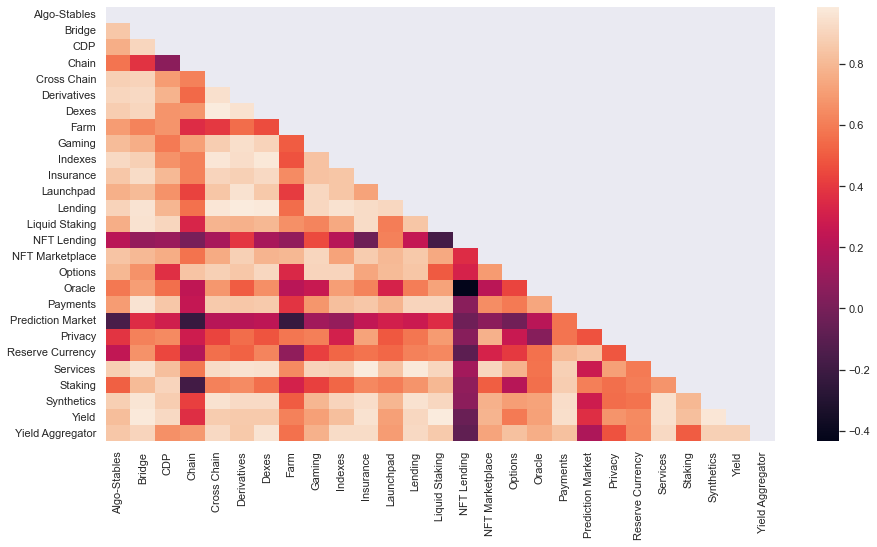

In [35]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr_df, mask=mask)